<a href="https://colab.research.google.com/github/Sam-No-Limits/PRODIGY_DS_01/blob/main/ML_TASK-02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2092134223.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(),inplace=True)



 Cluster Centers(Average values for each group):

   CustomerID    Gender        Age  Annual Income (k$)  Spending Score (1-100)
0   89.470588  0.441176  43.911765           56.588235               50.044118
1  162.000000  0.461538  32.692308           86.538462               82.128205
2   26.280000  0.400000  26.040000           27.600000               76.840000
3  162.000000  0.526316  40.394737           87.000000               18.631579
4   29.500000  0.333333  44.100000           29.766667               26.833333

Data with Cluster Labels:

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1   19                  15                      39   
1             2       1   21                  15                      81   
2             3       0   20                  16                       6   
3             4       0   23                  16                      77   
4             5       0   31                  17                   

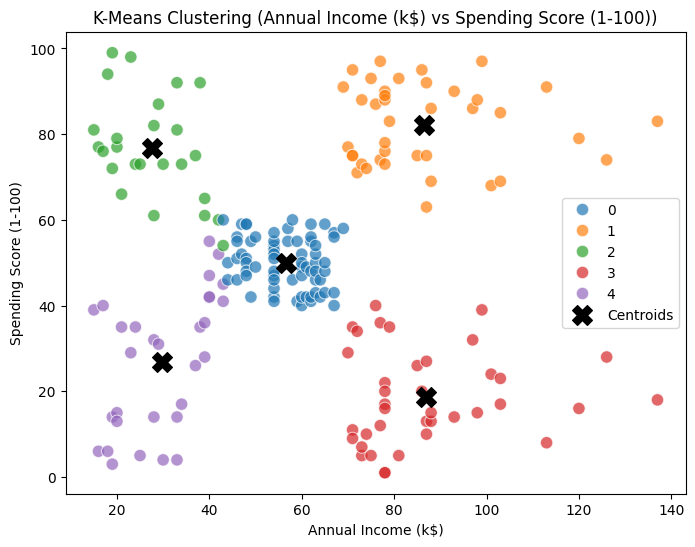

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/Mall_Customers.csv")
null_values=['Nan','nan','NULL','null','None','?','']
data.replace(null_values,np.nan,inplace = True)

for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))


for col in data.columns:
  if data[col].dtype=='object':
    data[col].fillna(data[col].mode()[0],inplace=True)
  else:
    data[col].fillna(data[col].mean(),inplace=True)

data=data.apply(pd.to_numeric,errors='coerce')
data.fillna(data.mean(),inplace=True)

scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

X = data.select_dtypes(include=[np.number])

K=5
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X)

data['cluster'] = kmeans.labels_
print("\n Cluster Centers(Average values for each group):\n")
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print(centers)
print("\nData with Cluster Labels:\n")
print(data)

print("\nData with Cluster Labels:\n")
print(data.head())

# ---------------- VISUALIZATION ----------------
# Optional: change these to columns available in your dataset
if 'Annual Income (k$)' in data.columns and 'Spending Score (1-100)' in data.columns:
    x_col = 'Annual Income (k$)'
    y_col = 'Spending Score (1-100)'
else:
    # If those columns don't exist, pick the first two numeric columns
    x_col, y_col = X.columns[:2]

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data[x_col],
    y=data[y_col],
    hue=data['cluster'],
    palette='tab10',
    s=80,
    alpha=0.7
)

# Plot cluster centers
plt.scatter(
    centers[x_col],
    centers[y_col],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title(f'K-Means Clustering ({x_col} vs {y_col})')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.show()